In [1]:
%pylab inline
%matplotlib inline

# Global Imports
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
import os
import sys
from pprint import pprint
from time import time
import datetime
from time import gmtime, strftime
import statsmodels.api as sm
from patsy import dmatrices

# Local Imports
path = str(os.path.expanduser('~')) + '/git/predictEPL/config'
sys.path.append(path)
import paths

sys.path.append(paths.UTILS)
import useful_methods
import hash_tags

Populating the interactive namespace from numpy and matplotlib


In [99]:
# read df
df = useful_methods.csv_dic_df("/Users/Bya/Dropbox/Research/datas/EPL/tweet_numbers.csv")

# str num => int num
columns = list(df.columns)[3:] + [list(df.columns)[0]]
for index in columns:
    df[index] = [int(item) for item in df[index]]

dfHome = df[['GW', 'Team_home', 'all_home', 'filter_home', 'non_rt_home']]
dfHome.columns = ['gw', 'team', 'tweet', 'tweet_filter', 'tweet_non_rt']

dfAway = df[['GW', 'Team_away', 'all_away', 'filter_away', 'non_rt_away']]
dfAway.columns = ['gw', 'team', 'tweet', 'tweet_filter', 'tweet_non_rt']

df = dfHome.append(dfAway, ignore_index=True)

df = df.sort_values(['gw'], ascending=True).reset_index(drop=True)

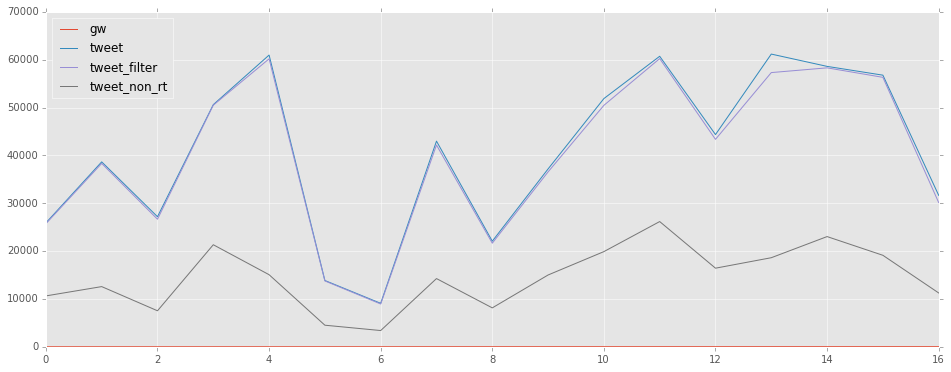

In [116]:
plt.figure(figsize=(16, 6))
df[df.team == 'United'].reset_index(drop=True).plot(figsize=(16, 6))

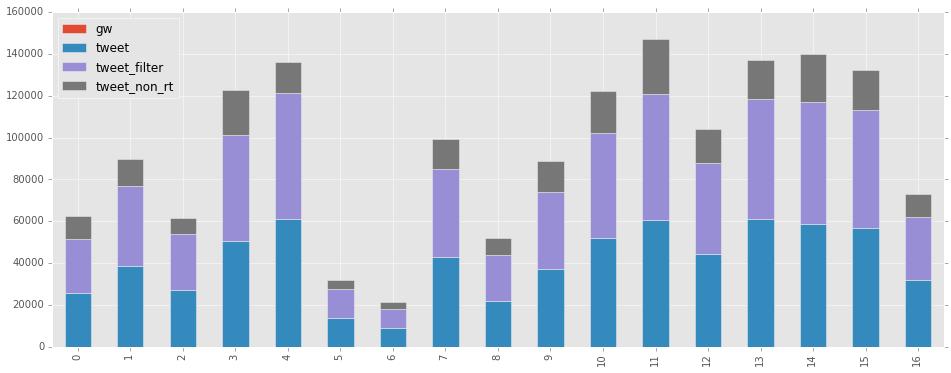

In [117]:
df[df.team == 'United'].reset_index(drop=True).plot(kind='bar', stacked=True, figsize=(16, 6))

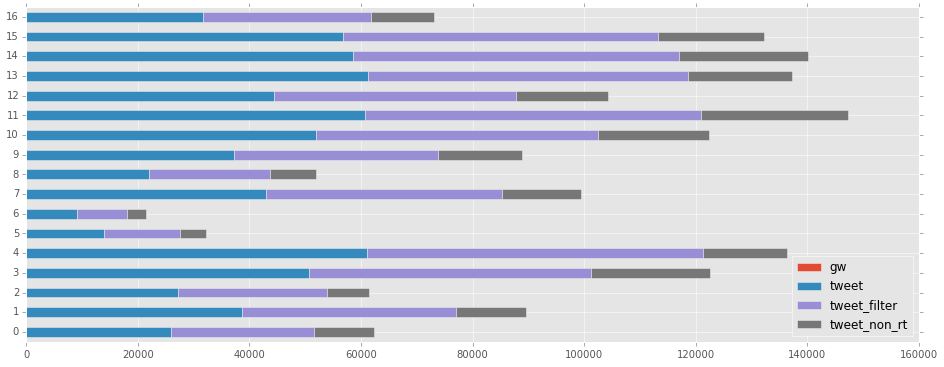

In [118]:
df[df.team == 'United'].reset_index(drop=True).plot(kind='barh', stacked=True, figsize=(16, 6))

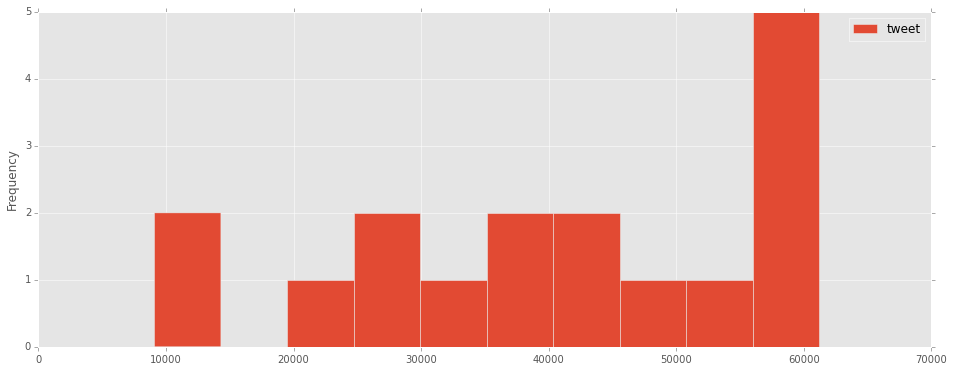

In [140]:
df[df.team == 'United'].reset_index(drop=True).plot(kind='hist', y='tweet', stacked=True, figsize=(16, 6))

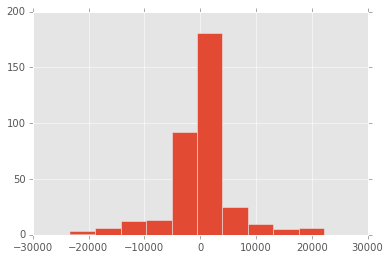

In [144]:
df['tweet_non_rt'].diff().hist()